# <font style="color:blue">Project 2: Kaggle Competition - Classification</font>


-  Maximum Points: 100
## Table
<div>
    <table>
        <tr><td><h3>Sr. no.</h3></td> <td><h3>Section</h3></td> <td><h3>Points</h3></td> </tr>
        <tr><td><h3>1</h3></td> <td><h3>Data Loader</h3></td> <td><h3>10</h3></td> </tr>
        <tr><td><h3>2</h3></td> <td><h3>Configuration</h3></td> <td><h3>5</h3></td> </tr>
        <tr><td><h3>3</h3></td> <td><h3>Evaluation Metric</h3></td> <td><h3>10</h3></td> </tr>
        <tr><td><h3>4</h3></td> <td><h3>Train and Validation</h3></td> <td><h3>5</h3></td> </tr>
        <tr><td><h3>5</h3></td> <td><h3>Model</h3></td> <td><h3>5</h3></td> </tr>
        <tr><td><h3>6</h3></td> <td><h3>Utils</h3></td> <td><h3>5</h3></td> </tr>
        <tr><td><h3>7</h3></td> <td><h3>Experiment</h3></td><td><h3>5</h3></td> </tr>
        <tr><td><h3>8</h3></td> <td><h3>TensorBoard Dev Scalars Log Link</h3></td> <td><h3>5</h3></td> </tr>
        <tr><td><h3>9</h3></td> <td><h3>Kaggle Profile Link</h3></td> <td><h3>50</h3></td> </tr>
    </table>
</div>


## <font style="color:green">1. Data Loader [10 Points]</font>

In this section, you have to write a class or methods, which will be used to get training and validation data loader.

You need to write a custom dataset class to load data.

**Note; There is   no separate validation data. , You will thus have to create your own validation set, by dividing the train data into train and validation data. Usually, we do 80:20 ratio for train and validation, respectively.**


For example:

```python
class KenyanFood13Dataset(Dataset):
    """
    
    """
    
    def __init__(self, *args):
    ....
    ...
    
    def __getitem__(self, idx):
    ...
    ...
    
    
```

```
def get_data(args1, *agrs):
    ....
    ....
    return train_loader, test_loader
```

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import random_split
import torch.nn.functional as F
from torchvision.transforms import functional as Fvision
from torchvision import datasets, transforms, models

from torch.optim import lr_scheduler
import torch.optim as optim

from torch.utils.tensorboard import SummaryWriter

import matplotlib.pyplot as plt

import os
import numpy as np
import pandas as pd
import time 

from PIL import Image

from dataclasses import dataclass

In [2]:
%matplotlib inline

Defining seed value

In [3]:
torch.manual_seed(21)

## Dataset

### COLAB

In [ ]:
if False:
    from google.colab import files
    data_root = "dataset/"
    !pip install -q kaggle
    ! mkdir ~/.kaggle
    %cd ~/.kaggle
    !pwd
    files.upload()
    ! mv kaggle_neu.json kaggle.json
    ! chmod 600 ~/.kaggle/kaggle.json
    # ! kaggle datasets list
    %cd /content
    !kaggle competitions download -c opencv-pytorch-dl-course-classification
    !mkdir dataset
    !unzip opencv-pytorch-dl-course-classification.zip -d dataset

### Train / Validation

In [4]:
class KenyanFood13Dataset(Dataset):
     
    def __init__(self, data_root, train=True, image_shape=None, transform=None):
        """
        init method of the class. 

         Parameters:         
         data_root (string): path of root directory.
         image_shape (int or tuple or list): [optional] int or tuple or list. Defaut is None. 
                                             If it is not None image will resize to the given shape.
         transform (method): method that will take image and transform it.
        """

        # get label to species mapping
        csv_file = 'train.csv'
       
        label_csv_path = os.path.join(data_root, csv_file)
        
        self.label_df = pd.read_csv(label_csv_path, delimiter=' *, *', engine='python')
        
        self.classes_list = ['githeri', 'ugali', 'kachumbari', 'matoke', 'mandazi', 'bhaji',
                               'sukumawiki', 'nyamachoma', 'chapati', 'kukuchoma', 'masalachips',
                               'pilau', 'mukimo']
        
        self.idx2class = {i: key for i, key in enumerate(self.classes_list)}
        self.class_to_idx = {key: i for i, key in enumerate(self.classes_list)}
        
        print('class_to_idx \n', self.class_to_idx)
        print('idx2class \n', self.idx2class)
        

        # set image_resize attribute
        if image_shape is not None:
            if isinstance(image_shape, int):
                self.image_shape = (image_shape, image_shape)

            elif isinstance(image_shape, tuple) or isinstance(image_shape, list):
                assert len(image_shape) == 1 or len(image_shape) == 2, 'Invalid image_shape tuple size'
                if len(image_shape) == 1:
                    self.image_shape = (image_shape[0], image_shape[0])
                else:
                    self.image_shape = image_shape
            else:
                raise NotImplementedError 

        else:
            self.image_shape = image_shape

        # set transform attribute
        self.transform = transform

        # kenyan food classes
        num_classes = 13 

        # initialize the data dictionary
        self.data_dict = {
            'image_path': [],
            'label': []
        }

        img_dir = os.path.join(data_root, 'images/images')

        for index, row in self.label_df.iterrows():
            img_path = os.path.join(img_dir, str(row['id'])+'.jpg')
            self.data_dict['image_path'].append(img_path)
            self.data_dict['label'].append(self.class_to_idx[row['class']]) 
            
                    
    def __len__(self):
        """
        return length of the dataset
        """
        return len(self.data_dict['label'])
    
    
    def __getitem__(self, idx):
        """
        For given index, return images with resize and preprocessing.
        """
        
        image = Image.open(self.data_dict['image_path'][idx]).convert("RGB")
        
        if self.image_shape is not None:
            image = Fvision.resize(image, self.image_shape)
        
        
        if self.transform is not None:
            image = self.transform(image)
            
        target = self.data_dict['label'][idx]
        
        return image, target 
    
    def common_name(self, label):
        """
        class label to common name mapping
        """
        return self.idx2class[label]
                

### Test

In [5]:
class KenyanFood13Dataset_test(Dataset):

    def __init__(self, data_root, train=True, image_shape=None, transform=None):
        """
        init method of the class.

         Parameters:
         data_root (string): path of root directory.
         image_shape (int or tuple or list): [optional] int or tuple or list. Defaut is None.
                                             If it is not None image will resize to the given shape.
         transform (method): method that will take image and transform it.
        """

        # get label to species mapping
        # TODO: teste e treino diferentes
       
        csv_file = 'test.csv'

        label_csv_path = os.path.join(data_root, csv_file)

        self.label_df = pd.read_csv(label_csv_path, delimiter=' *, *', engine='python')

        self.classes_list = ['githeri', 'ugali', 'kachumbari', 'matoke', 'mandazi', 'bhaji',
                               'sukumawiki', 'nyamachoma', 'chapati', 'kukuchoma', 'masalachips',
                               'pilau', 'mukimo']

        self.idx2class = {i: key for i, key in enumerate(self.classes_list)}
        self.class_to_idx = {key: i for i, key in enumerate(self.classes_list)}

        print('class_to_idx \n', self.class_to_idx)
        print('idx2class \n', self.idx2class)


        # set image_resize attribute
        if image_shape is not None:
            if isinstance(image_shape, int):
                self.image_shape = (image_shape, image_shape)

            elif isinstance(image_shape, tuple) or isinstance(image_shape, list):
                assert len(image_shape) == 1 or len(image_shape) == 2, 'Invalid image_shape tuple size'
                if len(image_shape) == 1:
                    self.image_shape = (image_shape[0], image_shape[0])
                else:
                    self.image_shape = image_shape
            else:
                raise NotImplementedError

        else:
            self.image_shape = image_shape

        # set transform attribute
        self.transform = transform

        # kenyan food classes
        num_classes = 13

        # initialize the data dictionary
        self.data_dict = {
            'image_path': [],
            'label': []
        }

        img_dir = os.path.join(data_root, 'images/images')

        for index, row in self.label_df.iterrows():
            img_path = os.path.join(img_dir, str(row['id'])+'.jpg')
            self.data_dict['image_path'].append(img_path)
            self.data_dict['label'].append('None')

    def __len__(self):
        """
        return length of the dataset
        """
        return len(self.data_dict['label'])


    def __getitem__(self, idx):
        """
        For given index, return images with resize and preprocessing.
        """

        image = Image.open(self.data_dict['image_path'][idx]).convert("RGB")

        if self.image_shape is not None:
            image = Fvision.resize(image, self.image_shape)


        if self.transform is not None:
            image = self.transform(image)

        target = self.data_dict['label'][idx]

        return image, target

    def common_name(self, label):
        """
        class label to common name mapping
        """
        return self.idx2class[label]

### Transforms

In [6]:
def image_common_transforms(mean=(0.4611, 0.4359, 0.3905), std=(0.2193, 0.2150, 0.2109)):
    
    common_transforms = transforms.Compose([
        transforms.Resize(227),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ])
    
    return common_transforms

In [7]:
def image_augmented_transforms(mean=(0.4611, 0.4359, 0.3905), std=(0.2193, 0.2150, 0.2109)):
        
    common_transforms = transforms.Compose([
        transforms.Resize(227),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean, std),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.RandomAutocontrast(),
        transforms.RandomGrayscale(),
        transforms.RandomAdjustSharpness(2,0.25),
        #transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        transforms.RandomRotation(55)
    ])
    
    return common_transforms

### Get Data

In [8]:
def get_data(batch_size, data_root, num_workers=4, data_augmentation=False):
    
    
    dataset = KenyanFood13Dataset(data_root)
    
    train_set_size = int(len(dataset) * 0.8)
    valid_set_size = len(dataset) - train_set_size
        
    train_dataset, val_dataset = random_split(dataset, [train_set_size, valid_set_size])
    
    if data_augmentation:
        train_dataset.dataset.transform = image_augmented_transforms()
    else:
        train_dataset.dataset.transform = image_common_transforms()
        
    val_dataset.dataset.transform = image_common_transforms()
  
    
        
    train_loader = DataLoader(dataset=train_dataset, shuffle=True, batch_size=batch_size)
    val_loader = DataLoader(dataset=val_dataset, shuffle=False, batch_size=batch_size)
    
    #print('3 ', val_loader.dataset.transform)
    
    print("Length of the train_loader:", len(train_loader.dataset))
    print("Length of the val_loader:", len(val_loader.dataset))
    
    
    return train_loader, val_loader

In [9]:
#train_loader, test_loader = get_data(16, 'opencv-pytorch-dl-course-classification', False)

## <font style="color:green">2. Configuration [5 Points]</font>

**Define your configuration here.**

For example:


```python
@dataclass
class TrainingConfiguration:
    '''
    Describes configuration of the training process
    '''
    batch_size: int = 10 
    epochs_count: int = 50  
    init_learning_rate: float = 0.1  # initial learning rate for lr scheduler
    log_interval: int = 5  
    test_interval: int = 1  
    data_root: str = "/kaggle/input/pytorch-opencv-course-classification/" 
    num_workers: int = 2  
    device: str = 'cuda'  
    
```

In [10]:
@dataclass
class TrainingConfiguration:
    '''
    Describes configuration of the training process
    '''
    batch_size: int = 8 
    epochs_count: int = 15
    init_learning_rate: float = 0.0001  # initial learning rate for lr scheduler
    log_interval: int = 5  
    test_interval: int = 1  
    data_root: str = "opencv-pytorch-dl-course-classification"  # "/kaggle/input/pytorch-opencv-course-classification/"
    num_workers: int = 2  
    device: str = 'cpu'  

## <font style="color:green">3. Evaluation Metric [10 Points]</font>

**Define methods or classes that will be used in model evaluation. For example, accuracy, f1-score etc.**

In [38]:
def log_metrics(y, y_pred):
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
    
    labels = ['githeri', 'ugali', 'kachumbari', 'matoke', 'mandazi', 'bhaji','sukumawiki', 'nyamachoma', 'chapati', 'kukuchoma', 'masalachips', 'pilau', 'mukimo']
    
    print(classification_report(y, y_pred))

    cm = confusion_matrix(y, y_pred)    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot()
    
    

## <font style="color:green">4. Train and Validation [5 Points]</font>


**Write the methods or classes to be used for training and validation.**

### Train

In [12]:
def train(
    train_config: TrainingConfiguration, model: nn.Module, optimizer: torch.optim.Optimizer,
    train_loader: torch.utils.data.DataLoader, epoch_idx: int, tb_writer: SummaryWriter
) -> None:
    
    # change model in training mode
    model.train()
    
    # to get batch loss
    batch_loss = np.array([])
    
    # to get batch accuracy
    batch_acc = np.array([])
        
    for batch_idx, (data, target) in enumerate(train_loader):
        
        # clone target
        indx_target = target.clone()
        # send data to device (it is mandatory if GPU has to be used)
        data = data.to(train_config.device)
        # send target to device
        target = target.to(train_config.device)

        # reset parameters gradient to zero
        optimizer.zero_grad()
        
        # forward pass to the model
        output = model(data)
        
        # cross entropy loss
        loss = F.cross_entropy(output, target)
        
        # find gradients w.r.t training parameters
        loss.backward()
        # Update parameters using gradients
        optimizer.step()
        
        batch_loss = np.append(batch_loss, [loss.item()])
        
        # get probability score using softmax
        prob = F.softmax(output, dim=1)
            
        # get the index of the max probability
        pred = prob.data.max(dim=1)[1]  
                        
        # correct prediction
        correct = pred.cpu().eq(indx_target).sum()
            
        # accuracy
        acc = float(correct) / float(len(data))
        
        batch_acc = np.append(batch_acc, [acc])

        if batch_idx % train_config.log_interval == 0 and batch_idx > 0:
            
            total_batch = epoch_idx * len(train_loader.dataset)/train_config.batch_size + batch_idx
            tb_writer.add_scalar('Loss/train-batch', loss.item(), total_batch)
            tb_writer.add_scalar('Accuracy/train-batch', acc, total_batch)
            
    epoch_loss = batch_loss.mean()
    epoch_acc = batch_acc.mean()
    return epoch_loss, epoch_acc

In [13]:
def validate(
    train_config: TrainingConfiguration,
    model: nn.Module,
    test_loader: torch.utils.data.DataLoader
) -> float:
    # 
    model.eval()
    test_loss = 0
    count_corect_predictions = 0
    y =[]
    y_pred =[]
    for data, target in test_loader:
        indx_target = target.clone()
        data = data.to(train_config.device)
        
        target = target.to(train_config.device)
        
        output = model(data)
        # add loss for each mini batch
        test_loss += F.cross_entropy(output, target).item()
        
        # get probability score using softmax
        prob = F.softmax(output, dim=1)
        
        # get the index of the max probability
        pred = prob.data.max(dim=1)[1] 
        
        # add correct prediction count
        count_corect_predictions += pred.cpu().eq(indx_target).sum()
        
        y = y + indx_target.tolist()
        y_pred = y_pred + pred.tolist()

    
    # average over number of mini-batches
    test_loss = test_loss / len(test_loader)  
    
    # average over number of dataset
    accuracy = 100. * count_corect_predictions / len(test_loader.dataset)
    
    return test_loss, accuracy/100.0

In [14]:
def main(model, optimizer,tb_writer, scheduler=None, training_configuration=TrainingConfiguration(), data_augmentation=True):
    
    # batch size
    batch_size_to_set = training_configuration.batch_size
    # num_workers
    num_workers_to_set = training_configuration.num_workers
    # epochs
    epoch_num_to_set = training_configuration.epochs_count

    # if GPU is available use training config, 
    # else lowers batch_size, num_workers and epochs count
    if torch.cuda.is_available() and train_config.device == 'cuda':
        device = "cuda"
    else:
        device = "cpu"
        num_workers_to_set = 4

    # data loader
    train_loader, val_loader = get_data(
        batch_size=batch_size_to_set,
        data_root=training_configuration.data_root,
        num_workers=num_workers_to_set,
        data_augmentation=data_augmentation
    )
    
    print('treino: ', len(train_loader.dataset))    
    print('val: ', len(val_loader.dataset))   
    
    
    
    # Update training configuration
    training_configuration = TrainingConfiguration(
        device=device,
        batch_size=batch_size_to_set,
        num_workers=num_workers_to_set
    )
        
    # send model to device (GPU/CPU)
    model.to(training_configuration.device)

    best_loss = torch.tensor(np.inf)    
    best_accu = -torch.tensor(np.inf)
    
    # epoch train/val loss
    epoch_train_loss = np.array([])
    epoch_val_loss = np.array([])
    
    # epch train/val accuracy
    epoch_train_acc = np.array([])
    epoch_val_acc = np.array([])
    
    # Calculate Initial Val Loss
    init_val_loss, init_val_accuracy = validate(training_configuration, model, val_loader)
    print("Initial Val Loss : {:.6f}, \nInitial Val Accuracy : {:.3f}%\n".format(init_val_loss, 
                                                                                   init_val_accuracy*100))
    
    # trainig time measurement
    t_begin = time.time()
    for epoch in range(training_configuration.epochs_count):
        
        # Train
        train_loss, train_acc = train(training_configuration, model, optimizer, train_loader, epoch, tb_writer)
        
        epoch_train_loss = np.append(epoch_train_loss, [train_loss])
        
        epoch_train_acc = np.append(epoch_train_acc, [train_acc])

        elapsed_time = time.time() - t_begin
        speed_epoch = elapsed_time / (epoch + 1)
        speed_batch = speed_epoch / len(train_loader)
        eta = speed_epoch * training_configuration.epochs_count - elapsed_time
        
        
         # add scalar (loss/accuracy) to tensorboard
        tb_writer.add_scalar('Loss/Train',train_loss, epoch)
        tb_writer.add_scalar('Accuracy/Train', train_acc, epoch)

        # add time metadata to tensorboard
        tb_writer.add_scalar('Time/elapsed_time', elapsed_time, epoch)
        tb_writer.add_scalar('Time/speed_epoch', speed_epoch, epoch)
        tb_writer.add_scalar('Time/speed_batch', speed_batch, epoch)
        tb_writer.add_scalar('Time/eta', eta, epoch)
        print("Train Loss : {:.6f}, \n  Train Accuracy : {:.3f}%\n".format(train_loss, train_acc*100))
        
        
        print("Elapsed {:.2f}s, {:.2f} s/epoch, {:.2f} s/batch, ets {:.2f}s".format(elapsed_time, speed_epoch, speed_batch, eta))

        # Validate
        if epoch % training_configuration.test_interval == 0:
            current_loss, current_accuracy = validate(training_configuration, model, val_loader)
            
            epoch_val_loss = np.append(epoch_val_loss, [current_loss])
        
            epoch_val_acc = np.append(epoch_val_acc, [current_accuracy])
            
            # add scalar (loss/accuracy) to tensorboard
            tb_writer.add_scalar('Loss/Validation', current_loss, epoch)
            tb_writer.add_scalar('Accuracy/Validation', current_accuracy, epoch)
            
            # add scalars (loss/accuracy) to tensorboard
            tb_writer.add_scalars('Loss/train-val', {'train': train_loss, 'validation': current_loss}, epoch)
            tb_writer.add_scalars('Accuracy/train-val', {'train': train_acc, 'validation': current_accuracy}, epoch)
            
            print("Val Loss : {:.6f}, \n  Val Accuracy : {:.3f}%\n".format(current_loss, current_accuracy*100))
            
            if current_accuracy >=  best_accu:
                best_accu = current_accuracy
                print("Saving model accuracy")
                save_model(model, device=training_configuration.device, model_file_name='bestacc.pt')

            
            if current_loss < best_loss:
                best_loss = current_loss
                print('Model Improved. Saving the Model...\n')
                save_model(model, device=training_configuration.device)
        
        # scheduler step/ update learning rate
        if scheduler is not None:
            scheduler.step()        
                
    print("Total time: {:.2f}, Best Loss: {:.3f}".format(time.time() - t_begin, best_loss))
    
    return model, epoch_train_loss, epoch_train_acc, epoch_val_loss, epoch_val_acc

## <font style="color:green">5. Model [5 Points]</font>

**Define your model in this section.**

**You are allowed to use any pre-trained model.**

In [15]:
def pretrained_model_traferlearning_old(num_class=13):
    
    resnet = models.resnet18(pretrained=True)
        
    for param in resnet.parameters():
        param.requires_grad = False
            
    last_layer_in = resnet.fc.in_features
    resnet.fc = nn.Linear(last_layer_in, num_class)
    
    return resnet

In [16]:
def pretrained_model_traferlearning(num_class=13, transfer=True):

    #model = models.efficientnet_v2_m(pretrained=True)
    model = models.efficientnet_b1(pretrained=True)

    if transfer:
        for param in model.parameters():
            param.requires_grad = False

    last_layer_in = model.classifier[1].in_features
    model.classifier[1] = nn.Linear(last_layer_in, num_class)

    return model

In [17]:
def save_model(model, device, model_dir='models', model_file_name='cat_dog_panda_classifier.pt'):
    

    if not os.path.exists(model_dir):
        os.makedirs(model_dir)

    model_path = os.path.join(model_dir, model_file_name)

    # make sure you transfer the model to cpu.
    if device == 'cuda':
        model.to('cpu')

    # save the state_dict
    torch.save(model.state_dict(), model_path)
    
    if device == 'cuda':
        model.to('cuda')
    
    return

In [18]:
def load_model(model, model_dir='models', model_file_name='cat_dog_panda_classifier.pt'):
    model_path = os.path.join(model_dir, model_file_name)

    # loading the model and getting model parameters by using load_state_dict
    model.load_state_dict(torch.load(model_path))
    
    return model

## <font style="color:green">6.Utils [5 Points]</font>

**Define those methods or classes, which have  not been covered in the above sections.**

In [19]:
def plot_loss_accuracy(train_loss, val_loss, train_acc, val_acc, colors, 
                       loss_legend_loc='upper center', acc_legend_loc='upper left', 
                       fig_size=(20, 10), sub_plot1=(1, 2, 1), sub_plot2=(1, 2, 2)):
    
    plt.rcParams["figure.figsize"] = fig_size
    fig = plt.figure()
    
    plt.subplot(sub_plot1[0], sub_plot1[1], sub_plot1[2])
    
    for i in range(len(train_loss)):
        x_train = range(len(train_loss[i]))
        x_val = range(len(val_loss[i]))
        
        min_train_loss = train_loss[i].min()
        
        min_val_loss = val_loss[i].min()
        
        plt.plot(x_train, train_loss[i], linestyle='-', color='tab:{}'.format(colors[i]), 
                 label="TRAIN LOSS ({0:.4})".format(min_train_loss))
        plt.plot(x_val, val_loss[i], linestyle='--' , color='tab:{}'.format(colors[i]), 
                 label="VALID LOSS ({0:.4})".format(min_val_loss))
        
    plt.xlabel('epoch no.')
    plt.ylabel('loss')
    plt.legend(loc=loss_legend_loc)
    plt.title('Training and Validation Loss')
        
    plt.subplot(sub_plot2[0], sub_plot2[1], sub_plot2[2])
    
    for i in range(len(train_acc)):
        x_train = range(len(train_acc[i]))
        x_val = range(len(val_acc[i]))
        
        max_train_acc = train_acc[i].max() 
        
        max_val_acc = val_acc[i].max() 
        
        plt.plot(x_train, train_acc[i], linestyle='-', color='tab:{}'.format(colors[i]), 
                 label="TRAIN ACC ({0:.4})".format(max_train_acc))
        plt.plot(x_val, val_acc[i], linestyle='--' , color='tab:{}'.format(colors[i]), 
                 label="VALID ACC ({0:.4})".format(max_val_acc))
        
    plt.xlabel('epoch no.')
    plt.ylabel('accuracy')
    plt.legend(loc=acc_legend_loc)
    plt.title('Training and Validation Accuracy')
    
    fig.savefig('sample_loss_acc_plot.png')
    plt.show()
    
    return   

## <font style="color:green">7. Experiment [5 Points]</font>

**Choose your optimizer and LR-scheduler and use the above methods and classes to train your model.**

In [20]:
logdir = "logs"

In [28]:
#%load_ext tensorboard
%reload_ext tensorboard

%tensorboard --logdir={logdir}

Reusing TensorBoard on port 6006 (pid 21452), started 5 days, 0:26:08 ago. (Use '!kill 21452' to kill it.)

In [22]:
model = pretrained_model_traferlearning(transfer=False)
print(model)

# get optimizer
train_config = TrainingConfiguration()


# optimizer
optimizer = optim.Adam(
    model.parameters(),
    lr = train_config.init_learning_rate,
)


### CHANGE HERE ###
decay_rate: float = 0.051
lmbda = lambda epoch: 1/(1 + decay_rate * epoch)
# Scheduler
scheduler = lr_scheduler.LambdaLR(optimizer, lr_lambda=lmbda)
# TODO: scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(tc.optimizer, T_max=7, eta_min=0)

C:\Users\igor\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\igor\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B1_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B1_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [23]:
# Tensorboard summary writer
tb_writer = SummaryWriter(os.path.join(logdir, 'efficientnet_b1 - transfer True, ep 15'))   


torch.cuda.empty_cache()
# train and validate
model, train_loss, train_acc, val_loss, val_acc = main(model, optimizer, tb_writer,  scheduler=scheduler, data_augmentation=True)

class_to_idx 
 {'githeri': 0, 'ugali': 1, 'kachumbari': 2, 'matoke': 3, 'mandazi': 4, 'bhaji': 5, 'sukumawiki': 6, 'nyamachoma': 7, 'chapati': 8, 'kukuchoma': 9, 'masalachips': 10, 'pilau': 11, 'mukimo': 12}
idx2class 
 {0: 'githeri', 1: 'ugali', 2: 'kachumbari', 3: 'matoke', 4: 'mandazi', 5: 'bhaji', 6: 'sukumawiki', 7: 'nyamachoma', 8: 'chapati', 9: 'kukuchoma', 10: 'masalachips', 11: 'pilau', 12: 'mukimo'}
Length of the train_loader: 5228
Length of the val_loader: 1308
treino:  5228
val:  1308
Initial Val Loss : 2.635577, 
Initial Val Accuracy : 5.046%

Train Loss : 1.629302, 
  Train Accuracy : 50.000%

Elapsed 1860.09s, 1860.09 s/epoch, 2.84 s/batch, ets 26041.22s
Val Loss : 0.960192, 
  Val Accuracy : 72.095%

Saving model accuracy
Model Improved. Saving the Model...

Train Loss : 0.936303, 
  Train Accuracy : 70.222%

Elapsed 3701.85s, 1850.92 s/epoch, 2.83 s/batch, ets 24062.00s
Val Loss : 0.803262, 
  Val Accuracy : 74.771%

Saving model accuracy
Model Improved. Saving the Mod

## Best Model - Val metrics

In [40]:
def run_bastmodel_evaluation(model):
    train_config = TrainingConfiguration()    
    train_loader, val_loader = get_data(16, 'opencv-pytorch-dl-course-classification', True)
   
     # data loader
    train_loader, val_loader = get_data(
        batch_size=16,
        data_root=train_config.data_root
    ) 
    
    model.eval()
    val_loss = 0
    count_corect_predictions = 0
    y =[]
    y_pred =[]
    model.to('cuda')
    for data, target in val_loader:
        indx_target = target.clone()        
        data = data.to('cuda')
        
        target = target.to(train_config.device)

        with torch.no_grad():
            output = model(data)  

        # Score to probability using softmax
        prob = F.softmax(output, dim=1)

        # get the index of the max probability
        pred = prob.data.max(dim=1)[1] 

        # resultados
        y = y + indx_target.tolist()        
        y_pred = y_pred + pred.tolist()
        
    log_metrics(y , y_pred)

In [32]:
model = pretrained_model_traferlearning()
mmodel = load_model(model, 'models')

class_to_idx 
 {'githeri': 0, 'ugali': 1, 'kachumbari': 2, 'matoke': 3, 'mandazi': 4, 'bhaji': 5, 'sukumawiki': 6, 'nyamachoma': 7, 'chapati': 8, 'kukuchoma': 9, 'masalachips': 10, 'pilau': 11, 'mukimo': 12}
idx2class 
 {0: 'githeri', 1: 'ugali', 2: 'kachumbari', 3: 'matoke', 4: 'mandazi', 5: 'bhaji', 6: 'sukumawiki', 7: 'nyamachoma', 8: 'chapati', 9: 'kukuchoma', 10: 'masalachips', 11: 'pilau', 12: 'mukimo'}
Length of the train_loader: 5228
Length of the val_loader: 1308
class_to_idx 
 {'githeri': 0, 'ugali': 1, 'kachumbari': 2, 'matoke': 3, 'mandazi': 4, 'bhaji': 5, 'sukumawiki': 6, 'nyamachoma': 7, 'chapati': 8, 'kukuchoma': 9, 'masalachips': 10, 'pilau': 11, 'mukimo': 12}
idx2class 
 {0: 'githeri', 1: 'ugali', 2: 'kachumbari', 3: 'matoke', 4: 'mandazi', 5: 'bhaji', 6: 'sukumawiki', 7: 'nyamachoma', 8: 'chapati', 9: 'kukuchoma', 10: 'masalachips', 11: 'pilau', 12: 'mukimo'}
Length of the train_loader: 5228
Length of the val_loader: 1308
              precision    recall  f1-score   

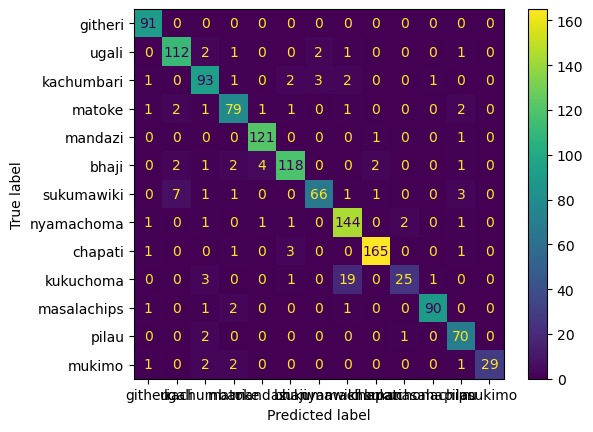

In [41]:
run_bastmodel_evaluation(model)

## <font style="color:green">8. TensorBoard Dev Scalars Log Link [5 Points]</font>

**Share your TensorBoard scalars logs link here You can also share (not mandatory) your GitHub link, if you have pushed this project in GitHub.**


For example, [Find Project2 logs here](https://tensorboard.dev/experiment/kMJ4YU0wSNG0IkjrluQ5Dg/#scalars).

https://github.com/igorlpa/OpenCV-PyTorch

## <font style="color:green">9. Kaggle Profile Link [50 Points]</font>

**Share your Kaggle profile link  with us here to score , points in  the competition.**

**For full points, you need a minimum accuracy of `75%` on the test data. If accuracy is less than `70%`, you gain  no points for this section.**


**Submit `submission.csv` (prediction for images in `test.csv`), in the `Submit Predictions` tab in Kaggle, to get evaluated for  this section.**

https://www.kaggle.com/igorlpa

# TEST - Kaggle Submission

In [46]:

model = pretrained_model_traferlearning()
mmodel = load_model(model, 'models', model_file_name='bestacc.pt')

C:\Users\igor\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\igor\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B1_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B1_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [47]:
train_config = TrainingConfiguration()

In [50]:
def run_test(model, result_file = 'result.csv'):
    dataset_test = KenyanFood13Dataset_test('opencv-pytorch-dl-course-classification', train = False, transform=image_common_transforms())

    dataloader_test = DataLoader(dataset_test, 16, shuffle=False)


    model.eval()
    test_loss = 0
    count_corect_predictions = 0
    y =[]
    y_pred =[]
    model.to('cuda')
    for data, target in dataloader_test:
        data = data.to('cuda')

        with torch.no_grad():
            output = model(data)  

        # Score to probability using softmax
        prob = F.softmax(output, dim=1)

        # get the index of the max probability
        pred = prob.data.max(dim=1)[1] 

        # resultados
        #y.append(indx_target.tolist())
        #y_pred.append(pred.tolist())
        y_pred = y_pred + pred.tolist()
    
    # Write CSV result
    result_df = pd.read_csv('opencv-pytorch-dl-course-classification/test.csv',header=0)
    aux = [dataset_test.common_name(x) for x in y_pred] 
    result_df['class'] = aux    
    result_df.to_csv(result_file, index=False)    

In [49]:
y_pred = run_test(model, result_file='result_bestacc.csv')

class_to_idx 
 {'githeri': 0, 'ugali': 1, 'kachumbari': 2, 'matoke': 3, 'mandazi': 4, 'bhaji': 5, 'sukumawiki': 6, 'nyamachoma': 7, 'chapati': 8, 'kukuchoma': 9, 'masalachips': 10, 'pilau': 11, 'mukimo': 12}
idx2class 
 {0: 'githeri', 1: 'ugali', 2: 'kachumbari', 3: 'matoke', 4: 'mandazi', 5: 'bhaji', 6: 'sukumawiki', 7: 'nyamachoma', 8: 'chapati', 9: 'kukuchoma', 10: 'masalachips', 11: 'pilau', 12: 'mukimo'}
